In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
data = pd.read_csv('Final.csv')
data.head(10)

,Patient_ID,PerformedDate,Name_calc,Albumin/Creatinine_Res,Lipids_Res,a1c_Res,BP_res,A1C_RF,BP_RF,Lip_RF,Alb_RF,Total_RF
0,1.000100e+12,2017-11-02,Urine Albumin/Creatinine Ratio (ACR),392.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
1,1.000100e+12,2017-10-16,Urine Albumin/Creatinine Ratio (ACR),221.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
2,1.000100e+12,2014-04-07,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
3,1.000100e+12,2014-03-07,Urine Albumin/Creatinine Ratio (ACR),8.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
4,1.000100e+12,2014-02-05,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
5,1.000100e+12,2014-01-17,Urine Albumin/Creatinine Ratio (ACR),61.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
6,1.000100e+12,2019-04-07,Urine Albumin/Creatinine Ratio (ACR),197.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
7,1.000100e+12,2019-03-13,Urine Albumin/Creatinine Ratio (ACR),163.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
8,1.000100e+12,2015-09-01,Urine Albumin/Creatinine Ratio (ACR),7.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
9,1.000100e+12,2015-07-13,Urine Albumin/Creatinine Ratio (ACR),3.0,NaN,NaN,NaN,0,0.0,0.0,1,1.0


In [4]:
datanew = data.loc[data['Name_calc'] == 'sBP (mmHg)']
datanew = datanew.drop(['Patient_ID', 'Name_calc', 'Albumin/Creatinine_Res', 'a1c_Res', 'Lipids_Res', 'A1C_RF','BP_RF','Lip_RF','Alb_RF','Total_RF'], axis=1)
print(datanew)

        PerformedDate  BP_res
4863609    2019-03-04   139.0
4863610    2018-12-18   142.0
4863611    2016-01-18   146.0
4863612    2019-11-14   124.0
4863613    2015-11-23   121.0
...               ...     ...
5322105    2015-08-17   133.0
5322106    2016-09-21   106.0
5322107    2015-07-17   107.0
5322108    2018-01-22   115.0
5322109    2017-08-30   116.0

[458501 rows x 2 columns]


In [5]:
datanew['PerformedDate'] = pd.to_datetime(datanew['PerformedDate'], infer_datetime_format=True)
indexedDataset = datanew.set_index(['PerformedDate'])
print(indexedDataset)

               BP_res
PerformedDate        
2019-03-04      139.0
2018-12-18      142.0
2016-01-18      146.0
2019-11-14      124.0
2015-11-23      121.0
...               ...
2015-08-17      133.0
2016-09-21      106.0
2015-07-17      107.0
2018-01-22      115.0
2017-08-30      116.0

[458501 rows x 1 columns]


In [6]:
from datetime import datetime

In [7]:
indexedDataset = indexedDataset.dropna()
print(indexedDataset)

               BP_res
PerformedDate        
2019-03-04      139.0
2018-12-18      142.0
2016-01-18      146.0
2019-11-14      124.0
2015-11-23      121.0
...               ...
2015-08-17      133.0
2016-09-21      106.0
2015-07-17      107.0
2018-01-22      115.0
2017-08-30      116.0

[447233 rows x 1 columns]


In [8]:
indexedDataset.index = pd.to_datetime(indexedDataset.index)
indexedDataset = indexedDataset.sort_index()
print(indexedDataset)

               BP_res
PerformedDate        
1983-01-05      114.0
1992-01-16      130.0
1994-07-15       98.0
1995-01-13       84.0
1995-01-13      136.0
...               ...
2019-12-31      164.0
2019-12-31      114.0
2019-12-31      101.0
2019-12-31      120.0
2019-12-31      164.0

[447233 rows x 1 columns]


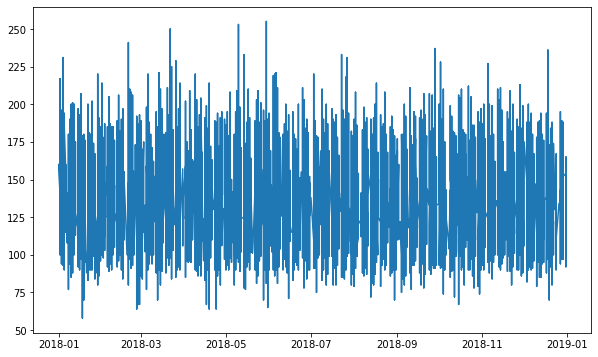

In [9]:
sub = indexedDataset['2018']
plt.plot(sub)

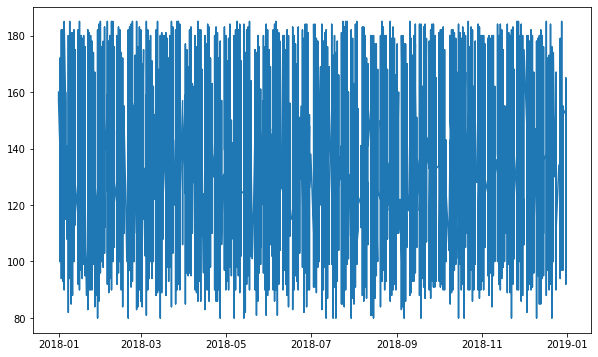

In [11]:
from scipy import stats
new = sub[(np.abs(stats.zscore(sub['BP_res'])) < 3)]
new2 = new.loc[(new!=0).any(axis=1)]
plt.plot(new2)

In [12]:
#Determing rolling statistics
rolmean = new2.rolling(window=12).mean()
rolstd = new2.rolling(window=12).std()
print(rolmean, rolstd)

                   BP_res
PerformedDate            
2018-01-01            NaN
2018-01-01            NaN
2018-01-02            NaN
2018-01-02            NaN
2018-01-02            NaN
...                   ...
2018-12-31     129.666667
2018-12-31     128.500000
2018-12-31     128.416667
2018-12-31     130.666667
2018-12-31     130.666667

[50855 rows x 1 columns]                   BP_res
PerformedDate           
2018-01-01           NaN
2018-01-01           NaN
2018-01-02           NaN
2018-01-02           NaN
2018-01-02           NaN
...                  ...
2018-12-31     10.594453
2018-12-31      9.327379
2018-12-31      9.346446
2018-12-31     10.798429
2018-12-31     10.798429

[50855 rows x 1 columns]


In [13]:
indexedDataset_logScale = np.log(new2)
print(indexedDataset_logScale)

                 BP_res
PerformedDate          
2018-01-01     5.075174
2018-01-01     5.056246
2018-01-02     4.941642
2018-01-02     4.644391
2018-01-02     4.836282
...                 ...
2018-12-31     4.700480
2018-12-31     4.882802
2018-12-31     4.836282
2018-12-31     5.003946
2018-12-31     4.844187

[50855 rows x 1 columns]


In [14]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
print(movingAverage, movingSTD)

                 BP_res
PerformedDate          
2018-01-01          NaN
2018-01-01          NaN
2018-01-02          NaN
2018-01-02          NaN
2018-01-02          NaN
...                 ...
2018-12-31     4.861870
2018-12-31     4.853470
2018-12-31     4.852811
2018-12-31     4.869471
2018-12-31     4.869471

[50855 rows x 1 columns]                  BP_res
PerformedDate          
2018-01-01          NaN
2018-01-01          NaN
2018-01-02          NaN
2018-01-02          NaN
2018-01-02          NaN
...                 ...
2018-12-31     0.082482
2018-12-31     0.073613
2018-12-31     0.073739
2018-12-31     0.083635
2018-12-31     0.083635

[50855 rows x 1 columns]


In [15]:
# Get the difference between the moving average and the actual number of passengers
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,BP_res
PerformedDate,
2018-01-02,0.040258
2018-01-02,-0.089920
2018-01-02,0.005849
2018-01-02,0.060101
2018-01-02,-0.046893
2018-01-02,-0.068498
2018-01-02,-0.112999
2018-01-02,-0.044944
2018-01-02,-0.143131


In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['BP_res'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

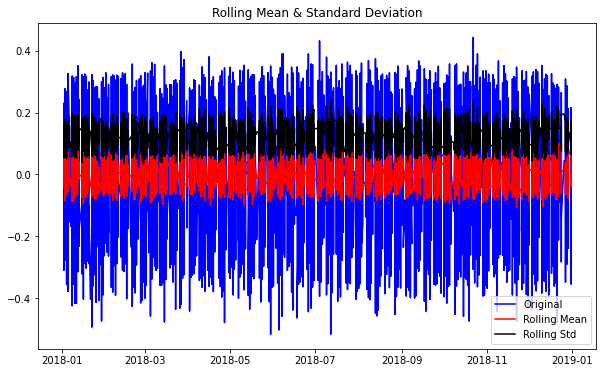

Results of Dickey-Fuller Test:
Test Statistic                   -48.119038
p-value                            0.000000
#Lags Used                        57.000000
Number of Observations Used    50786.000000
Critical Value (1%)               -3.430479
Critical Value (5%)               -2.861597
Critical Value (10%)              -2.566800
dtype: float64


In [17]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000000000
test_stationarity(datasetLogScaleMinusMovingAverage)

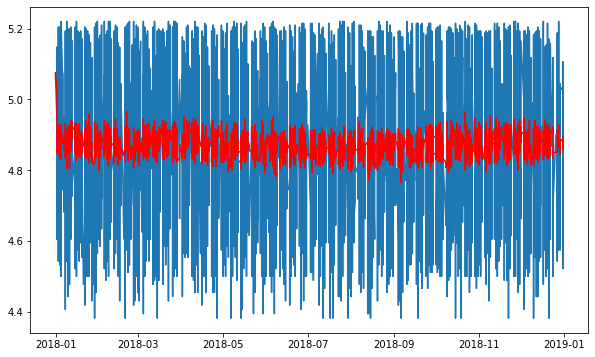

In [18]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

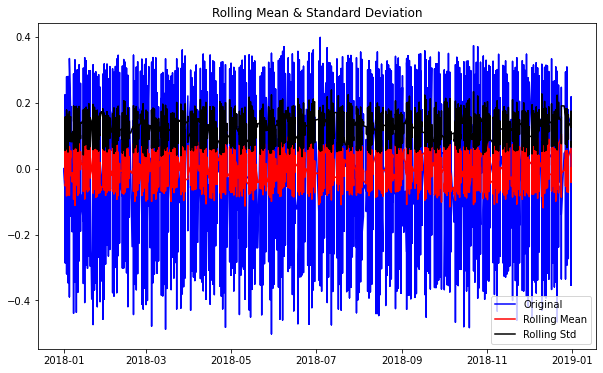

Results of Dickey-Fuller Test:
Test Statistic                   -41.214626
p-value                            0.000000
#Lags Used                        56.000000
Number of Observations Used    50798.000000
Critical Value (1%)               -3.430479
Critical Value (5%)               -2.861597
Critical Value (10%)              -2.566800
dtype: float64


In [19]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

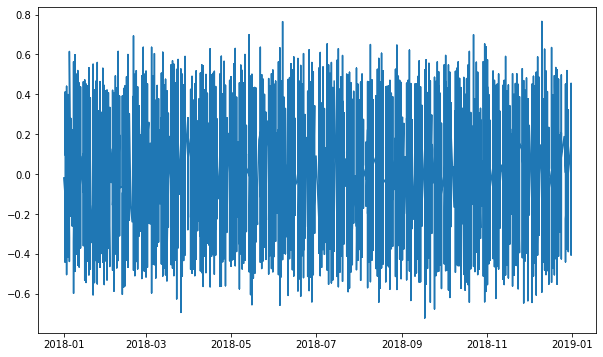

In [20]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

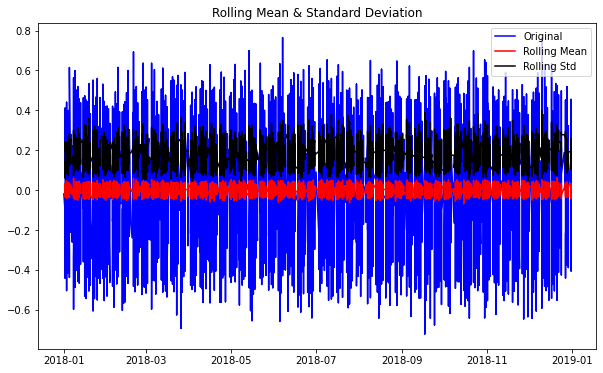

Results of Dickey-Fuller Test:
Test Statistic                   -51.080275
p-value                            0.000000
#Lags Used                        57.000000
Number of Observations Used    50796.000000
Critical Value (1%)               -3.430479
Critical Value (5%)               -2.861597
Critical Value (10%)              -2.566800
dtype: float64


In [21]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [22]:
indexedDataset_logScale.index = pd.to_datetime(indexedDataset_logScale.index)

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


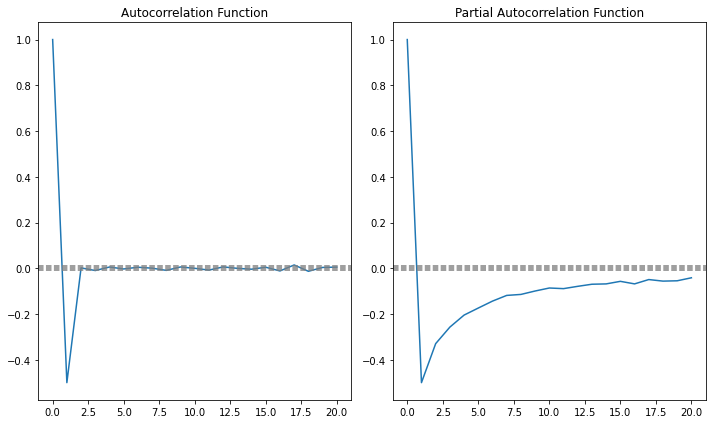

In [23]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting AR model


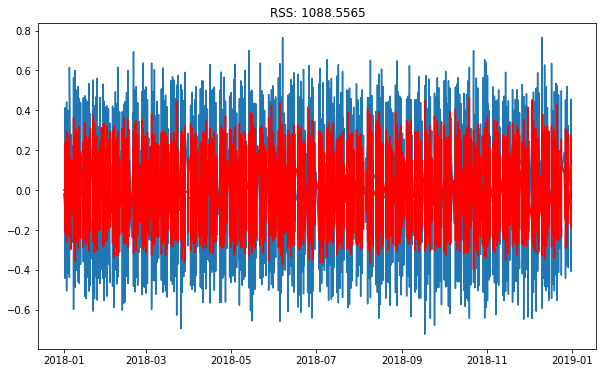

In [25]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['BP_res'])**2))
print('Plotting AR model')

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting AR model


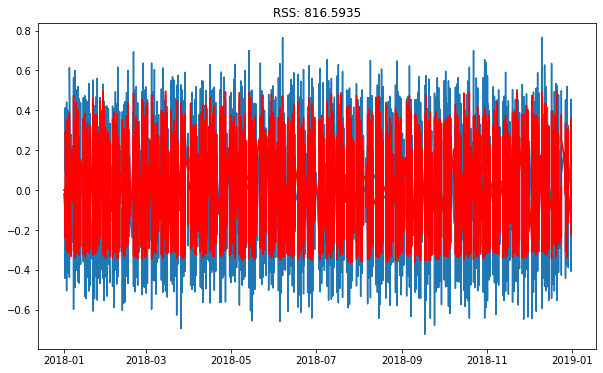

In [27]:
#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['BP_res'])**2))
print('Plotting AR model')

In [28]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['BP_res'])**2))

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


MemoryError: Unable to allocate 19.2 GiB for an array with shape (50797, 50797) and data type float64

In [29]:
predictions_ARIMA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

PerformedDate
2018-01-01   -4.214504e-08
2018-01-02    9.426332e-03
2018-01-02    8.234146e-02
2018-01-02    2.837064e-01
2018-01-02    7.424530e-02
dtype: float64


In [30]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

PerformedDate
2018-01-01   -4.214504e-08
2018-01-02    9.426290e-03
2018-01-02    9.176775e-02
2018-01-02    3.754742e-01
2018-01-02    4.497195e-01
dtype: float64


In [31]:
#predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#predictions_ARIMA_log.head()

predictions_ARIMA_log = pd.Series(indexedDataset_logScale.iloc[0,0],index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

PerformedDate
2018-01-01    5.075174
2018-01-01    5.075174
2018-01-02    5.084600
2018-01-02    5.166942
2018-01-02    5.450648
dtype: float64

MemoryError: Unable to allocate 17.1 GiB for an array with shape (2290788221,) and data type int64

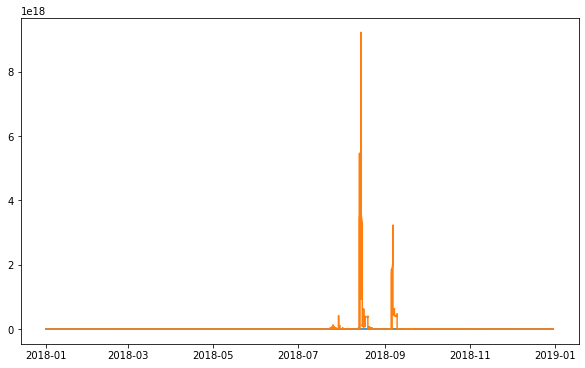

In [32]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(new2)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDataset['BP_res'])**2)/len(indexedDataset['BP_res'])))